#1. Import de Bibliotecas:

In [29]:
!pip install nxviz

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import zipfile
import nxviz as nv
from scipy import stats

In [2]:
!apt-get install megatools
!megadl 'https://mega.nz/folder/G9h3nABb#PfiCEbmAhSndPWIhkwkiVA'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
megatools is already the newest version (1.10.3-1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
ERROR: File already exists at /content/Marvel/hero-network.csv
ERROR: File already exists at /content/Marvel/nodes.csv
ERROR: File already exists at /content/Marvel/edges.csv


#2. Comparação com Grafo

###2.1. Abrir Grafo:

In [3]:
vertices = pd.read_csv('/content/Marvel/nodes.csv')
print(vertices)

                       node   type
0                   2001 10  comic
1                    2001 8  comic
2                    2001 9  comic
3      24-HOUR MAN/EMMANUEL   hero
4      3-D MAN/CHARLES CHAN   hero
...                     ...    ...
19085           ZOTA, CARLO   hero
19086                  ZOTA   hero
19087                 ZURAS   hero
19088                  ZURI   hero
19089                 ZZZAX   hero

[19090 rows x 2 columns]


In [4]:
arestas = pd.read_csv('/content/Marvel/edges.csv')
print(arestas)

                       hero     comic
0      24-HOUR MAN/EMMANUEL    AA2 35
1      3-D MAN/CHARLES CHAN     AVF 4
2      3-D MAN/CHARLES CHAN     AVF 5
3      3-D MAN/CHARLES CHAN     COC 1
4      3-D MAN/CHARLES CHAN    H2 251
...                     ...       ...
96099                 ZZZAX    H2 326
96100                 ZZZAX    H2 327
96101                 ZZZAX  M/CP 8/4
96102                 ZZZAX     PM 47
96103                 ZZZAX   WCA2 12

[96104 rows x 2 columns]


In [5]:
data = pd.read_csv('/content/Marvel/hero-network.csv')
print(data)

                       hero1                 hero2
0              LITTLE, ABNER        PRINCESS ZANDA
1              LITTLE, ABNER  BLACK PANTHER/T'CHAL
2       BLACK PANTHER/T'CHAL        PRINCESS ZANDA
3              LITTLE, ABNER        PRINCESS ZANDA
4              LITTLE, ABNER  BLACK PANTHER/T'CHAL
...                      ...                   ...
574462  COLOSSUS II/PETER RA              CALLISTO
574463              CALLISTO               ROGUE /
574464              CALLISTO              CALIBAN/
574465              CALIBAN/               ROGUE /
574466  HULK/DR. ROBERT BRUC     MARKS, DR. SHIELA

[574467 rows x 2 columns]


In [6]:
# Criar um grafo direcionado
G = nx.DiGraph()
for index, row in data.iterrows():
    G.add_edge(row['hero1'], row['hero2'])

# Converter para grafo não direcionado para simplificar a visualização
G_undirected = G.to_undirected()

### 2.2. Valores Iniciais:

In [8]:
print(f'Numero de Vertices: {G.number_of_nodes()}')
print("Primeiros 10 Vertices:")
for i, edge in enumerate(G.nodes()):
    if i < 10:
        print(edge)
    else:
        break
print('')
print(f'Numero de Arestas: {G.number_of_edges()}')
print("Primeiras 10 Arestas:")
for i, edge in enumerate(G.edges()):
    if i < 10:
        print(edge)
    else:
        break

Numero de Vertices: 6426
Primeiros 10 Vertices:
LITTLE, ABNER
PRINCESS ZANDA
BLACK PANTHER/T'CHAL
STEELE, SIMON/WOLFGA
FORTUNE, DOMINIC
ERWIN, CLYTEMNESTRA
IRON MAN/TONY STARK 
IRON MAN IV/JAMES R.
RAVEN, SABBATH II/EL
CARNIVORE/COUNT ANDR

Numero de Arestas: 224181
Primeiras 10 Arestas:
('LITTLE, ABNER', 'PRINCESS ZANDA')
('LITTLE, ABNER', "BLACK PANTHER/T'CHAL")
('LITTLE, ABNER', 'CARNIVORE/COUNT ANDR')
('LITTLE, ABNER', 'BINARY/CAROL DANVERS')
('LITTLE, ABNER', 'FIN FANG FOOM/MIDGAR')
('LITTLE, ABNER', 'THOR/DR. DONALD BLAK')
('LITTLE, ABNER', 'IRON MAN/TONY STARK ')
('LITTLE, ABNER', 'HOGAN, VIRGINIA PEPP')
('LITTLE, ABNER', 'TEMPEST II/NICOLETTE')
('LITTLE, ABNER', 'JARVIS, EDWIN ')


###2.3. Densidade:

In [10]:
# Calcular métricas
density = nx.density(G)

# Exibir algumas métricas
print(f"Densidade do grafo: {density:.4f}")

Densidade do grafo: 0.0054


- De acordo com a densidade analisada, podemos notar que ele não é tão denso assim, nos permitindo concluir que a maioria dos heróis não se relacionam com outros, podendo gerar círculos sociais ou interações nichadas. Isso se dá graças a existência de diversos ecossistemas e universos, criando histórias totalmente diferente umas das outras, então muitos heróis acabam nem tendo contato uns com os outros.
<p> <b> O que podemos ver a partir dessa informação:
- Coeficiente de Agrupamento médio:</b> Com ele podemos entender se realmente há formação de grupos, dando sentido ao nível de densidade.

###2.4. Agrupamento (Clustering)

In [16]:
average_clustering = nx.average_clustering(G)
print(f"Coeficiente de Agrupamento Médio do grafo: {average_clustering}")
print("")

local_clustering = nx.clustering(G)
print("\nOs 50 Primeiros coeficientes de Agrupamento Local para cada nó no grafo:")
for i, (node, cc) in enumerate(local_clustering.items()):
    if i < 50:
        print(f"Nó {node}: {cc}")
    else:
        break

Coeficiente de Agrupamento Médio do grafo: 0.6410861516174863


Os 50 Primeiros coeficientes de Agrupamento Local para cada nó no grafo:
Nó LITTLE, ABNER: 0.5317919075144508
Nó PRINCESS ZANDA: 0.8118811881188119
Nó BLACK PANTHER/T'CHAL: 0.14799620876517008
Nó STEELE, SIMON/WOLFGA: 0.6150442477876106
Nó FORTUNE, DOMINIC: 0.5149700598802395
Nó ERWIN, CLYTEMNESTRA: 0.3449232778321907
Nó IRON MAN/TONY STARK : 0.060231881324458426
Nó IRON MAN IV/JAMES R.: 0.14996566886598126
Nó RAVEN, SABBATH II/EL: 0.55
Nó CARNIVORE/COUNT ANDR: 0.5784922394678492
Nó GHOST: 0.42041015625
Nó ZIMMER, ABE: 0.4227840067696213
Nó FU MANCHU: 0.3379140239605356
Nó TARR, BLACK JACK: 0.3417381974248927
Nó SMITH, SIR DENIS NAY: 0.3828125
Nó SHANG-CHI: 0.23912282748162836
Nó STARSHINE II/BRANDY : 0.22705660377358491
Nó ROM, SPACEKNIGHT: 0.2776593013841992
Nó MAN-THING/THEODORE T: 0.2561388807927718
Nó WU, LEIKO: 0.3402306648575305
Nó DOCTOR DREDD: 0.5488721804511278
Nó RESTON, CLIVE: 0.327021494370522
Nó JACKSON, STEV

<b> Agrupamento Médio: </b> Com um coeficiente de Agrupamento Médio de 0.64 não dá para de cara tomar conclusões, ao mesmo tempo que os grupos estão conectados eles não estão, mas mostra que alguns universos tem ligações mas provavelmente outros não. Este valor tende a formação de panelas, mas não o suficiente para ser algo muito bem estruturado, isso pode se dar ao fato de várias interações entre universos nos quadrinhos, onde frequentemente há realidades alternativas e multiversos.
<p> <b> Agrupamento Local: </b> Com valores que variam muito, podemos notar que existem heróis que participam de panelas muito bem conectadas (Um valor alto significa que os vizinhos dele tambem se conhecem) mas outros tem valores baixos, significando que conhecem muitas pessoas que não se conhecem, como exemplo de valor alto temos a Princess Zanda, que é do universo do Pantera Negra. Isso pode significar que ela é um personagem que só é conectada com membros desse mesmo universo, formando uma panela que não sai muito, e ao ver suas histórias vimos que ela é um personagem que não interage com outros universos. Já com valores baixos temos o Hulk, com 0.097, que significa que ele se conecta com muita gente que não se conhece, mostrando que ele participa e interage com diversos universos diferentes.
<p> <b> O que podemos ver a partir dessa informação:
- Grafo Conexo:</b> Com ele vamos vem em prática se existem grupos totalmente isolados, já que os coeficientes abordados mostram uma certa tendencia a existência de grupos.

###2.5. Estudos de padrões:

In [19]:
num_components = nx.number_connected_components(G_undirected)
num_components

4

Isso mesmo, existem grupos totalmente distindos, ao menos 4 universos que não tem relações nenhuma uns com os outros, no universo Marvel existem vários universos, e nos quadrinhos, diversos heróis participam de universos diferentes, mas essa base mostra que pelo menos 4 grupos são totalmente desconectados uns com os outros.

####2.5.1. Centralidade de Grau:

Esse cálculo busca ver qual herói tem mais conexões, maior grau, isso no contexto seria saber quais heróis estão presentes em mais quadrinhos distintos:

In [20]:
degree_centrality = nx.degree_centrality(G)

top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 heróis por grau de centralidade:", top_degree)

Top 5 heróis por grau de centralidade: [('CAPTAIN AMERICA', 0.44420233463035025), ('SPIDER-MAN/PETER PAR', 0.3989105058365759), ('IRON MAN/TONY STARK ', 0.34832684824902727), ('WOLVERINE/LOGAN ', 0.31688715953307395), ('THING/BENJAMIN J. GR', 0.314863813229572)]


O Capitão américa, não só na base mas também empiricamente pode ser dastacado como um dos personagens que mais aparece em diversos contextos.

####2.5.2. Meio de Caminho

Nesse contexto, betweeness seria a pessoa que conecta outras pessoas, o cara que conhece outro cara:

In [9]:
betweenness_centrality = nx.betweenness_centrality(G)

top_degree = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 heróis por grau de centralidade:", top_degree)

Top 5 heróis por grau de centralidade: [('SPIDER-MAN/PETER PAR', 0.0690219748738283), ('CAPTAIN AMERICA', 0.05322542588994159), ('IRON MAN/TONY STARK ', 0.03438131183057358), ('HAVOK/ALEX SUMMERS ', 0.032513058332247984), ('WOLVERINE/LOGAN ', 0.032364999117745805)]


Como centralidade, o Homem Aranha seria o herói que mais aparece no meio do caminho, tem várias interações, e é por meio dele que voce consegue chegar em quem você quer.

####2.5.3. EigenVector

Por Auto Vetor, podemos saber quem é que realmente conhece diretamente pessoas mais influentes:

In [10]:
eigenvector = nx.eigenvector_centrality(G)

top_degree = sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 heróis por auto vetor:", top_degree)

Top 5 heróis por auto vetor: [('CAPTAIN AMERICA', 0.12343025710980428), ('THING/BENJAMIN J. GR', 0.10637166432680009), ('IRON MAN/TONY STARK ', 0.10473812219115791), ('SPIDER-MAN/PETER PAR', 0.10415175342166437), ('MR. FANTASTIC/REED R', 0.10412748219146752)]


O Capitão América além de aparecer constantemente em outros universos, também conhece pessoas influentes, e acaba sendo o meio do caminho de grande parte das conexões.

###2.6. Plots:

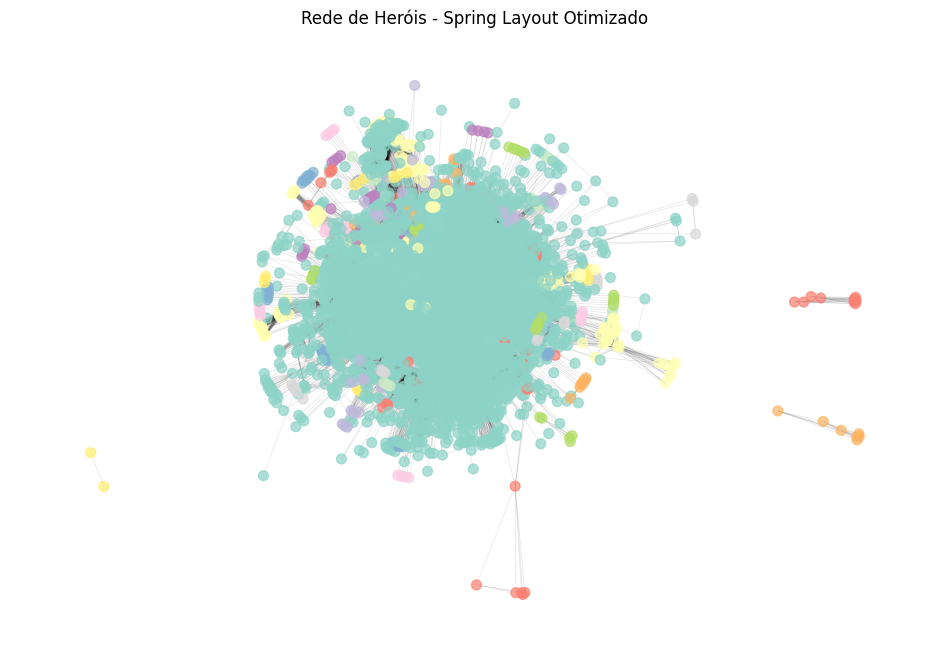

In [26]:
# Detectar comunidades para colorir os clusters
communities = list(nx.algorithms.community.greedy_modularity_communities(G_undirected))
node_to_community = {}
for idx, community in enumerate(communities):
    for node in community:
        node_to_community[node] = idx

# Gerar layout com spring_layout otimizado
pos = nx.spring_layout(G_undirected, k=0.2, iterations=200, seed=42)  # Ajuste k e iterations

# Desenhar o grafo
plt.figure(figsize=(12, 8))
node_colors = [node_to_community.get(node, -1) for node in G_undirected.nodes()]
nx.draw_networkx_nodes(G_undirected, pos, node_size=50, node_color=node_colors, cmap=plt.cm.Set3, alpha=0.7)
nx.draw_networkx_edges(G_undirected, pos, alpha=0.1, width=0.5)
plt.title("Rede de Heróis - Spring Layout Otimizado")
plt.axis('off')
plt.show()

In [43]:
# Encontrar o maior componente conectado
largest_cc = max(nx.connected_components(G_undirected), key=len)
G_largest = G_undirected.subgraph(largest_cc)

Comprimento médio do caminho no maior componente: 2.64
Diâmetro do maior componente: 5
Tamanho do maior componente: 6408 de 6426 nós


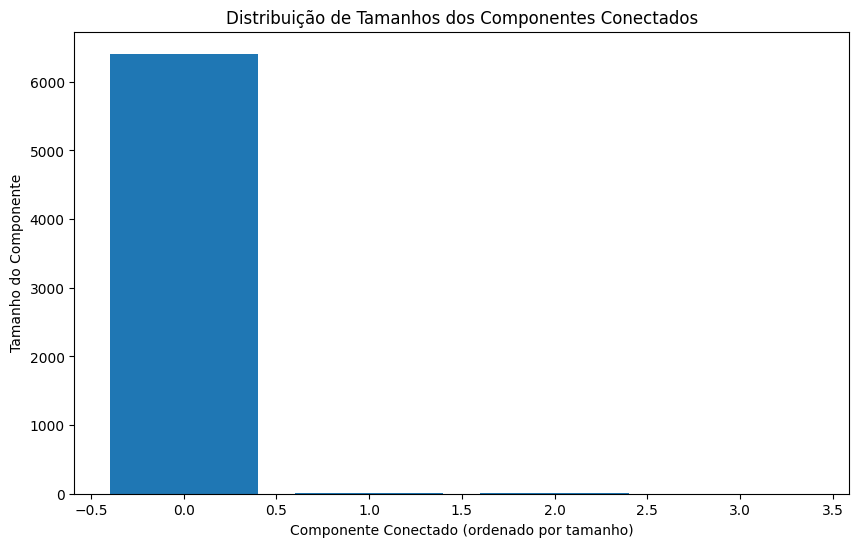

In [42]:
# Calcular métricas de navegabilidade
try:
    avg_path_length = nx.average_shortest_path_length(G_largest)
    diameter = nx.diameter(G_largest)
    print(f"Comprimento médio do caminho no maior componente: {avg_path_length:.2f}")
    print(f"Diâmetro do maior componente: {diameter}")
    print(f"Tamanho do maior componente: {len(G_largest)} de {G_undirected.number_of_nodes()} nós")
except nx.NetworkXError:
    print("O maior componente não é conexo ou é muito pequeno para calcular.")

# Visualizar a distribuição de componentes (opcional)
component_sizes = [len(c) for c in sorted(nx.connected_components(G_undirected), key=len, reverse=True)]
plt.figure(figsize=(10, 6))
plt.bar(range(len(component_sizes)), component_sizes)
plt.xlabel('Componente Conectado (ordenado por tamanho)')
plt.ylabel('Tamanho do Componente')
plt.title('Distribuição de Tamanhos dos Componentes Conectados')
plt.show()

###2.7. Comparação com Redes Sintéticas:

Grafo Real - Nós: 6426, Arestas: 167219, Grau médio: 52.04

Grafo Real:
Densidade: 0.0081
Coeficiente de agrupamento médio: 0.7747
Comprimento médio do caminho: inf
Grau médio: 52.04

Grafo Erdős-Rényi:
Densidade: 0.0081
Coeficiente de agrupamento médio: 0.0081
Comprimento médio do caminho: 2.64
Grau médio: 52.18

Grafo Barabási-Albert:
Densidade: 0.0081
Coeficiente de agrupamento médio: 0.0299
Comprimento médio do caminho: 2.54
Grau médio: 51.79

Grafo Watts-Strogatz:
Densidade: 0.0081
Coeficiente de agrupamento médio: 0.2562
Comprimento médio do caminho: 2.78
Grau médio: 52.00


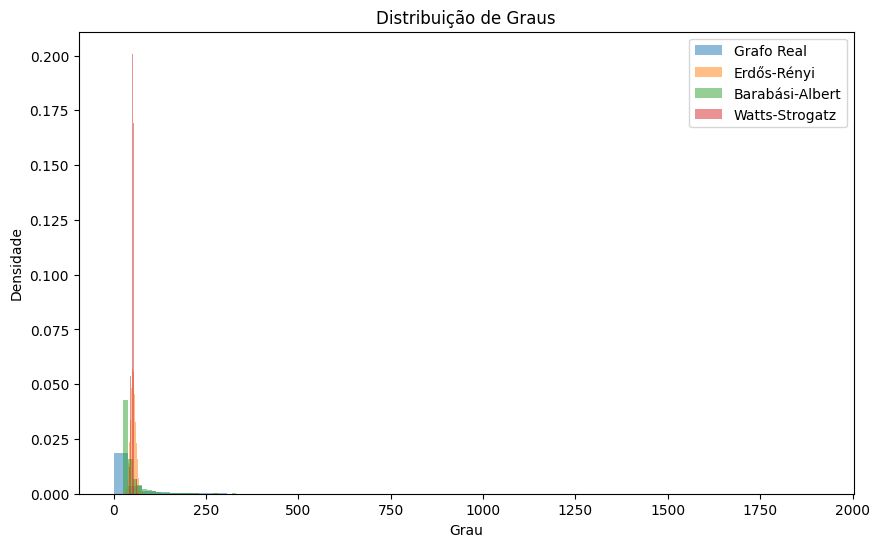

In [27]:
# Parâmetros do grafo real
n_nodes = G_undirected.number_of_nodes()
n_edges = G_undirected.number_of_edges()
avg_degree = 2 * n_edges / n_nodes  # Grau médio (aproximado)

print(f"Grafo Real - Nós: {n_nodes}, Arestas: {n_edges}, Grau médio: {avg_degree:.2f}")

# 1. Gerar grafo Erdős-Rényi (ER)
# Probabilidade p ajustada para ter número de arestas similar
p_er = n_edges / (n_nodes * (n_nodes - 1) / 2)
G_er = nx.erdos_renyi_graph(n_nodes, p_er, seed = 24003315)

# 2. Gerar grafo Barabási-Albert (BA)
# m é o número de arestas por novo nó, ajustado para grau médio
m_ba = int(round(avg_degree / 2))
G_ba = nx.barabasi_albert_graph(n_nodes, m_ba, seed = 24002125)

# 3. Gerar grafo Watts-Strogatz (WS)
# k é o número de vizinhos mais próximos, p_ws é a probabilidade de rewiring
k_ws = int(round(avg_degree))
p_ws = 0.3  # Probabilidade de rewiring (ajustável)
G_ws = nx.watts_strogatz_graph(n_nodes, k_ws, p_ws, seed = 23027619)

# Função para calcular métricas
def calculate_metrics(G, name):
    density = nx.density(G)
    clustering = nx.average_clustering(G)
    try:
        avg_shortest_path = nx.average_shortest_path_length(G)
    except nx.NetworkXError:
        avg_shortest_path = float('inf')  # Caso o grafo não seja conexo
    degree_dist = [d for n, d in G.degree()]
    avg_degree = np.mean(degree_dist)
    print(f"\n{name}:")
    print(f"Densidade: {density:.4f}")
    print(f"Coeficiente de agrupamento médio: {clustering:.4f}")
    print(f"Comprimento médio do caminho: {avg_shortest_path:.2f}")
    print(f"Grau médio: {avg_degree:.2f}")
    return degree_dist

# Calcular métricas para cada grafo
degree_real = calculate_metrics(G_undirected, "Grafo Real")
degree_er = calculate_metrics(G_er, "Grafo Erdős-Rényi")
degree_ba = calculate_metrics(G_ba, "Grafo Barabási-Albert")
degree_ws = calculate_metrics(G_ws, "Grafo Watts-Strogatz")

# Plotar a distribuição de graus
plt.figure(figsize=(10, 6))
plt.hist(degree_real, bins=50, alpha=0.5, label='Grafo Real', density=True)
plt.hist(degree_er, bins=50, alpha=0.5, label='Erdős-Rényi', density=True)
plt.hist(degree_ba, bins=50, alpha=0.5, label='Barabási-Albert', density=True)
plt.hist(degree_ws, bins=50, alpha=0.5, label='Watts-Strogatz', density=True)
plt.title('Distribuição de Graus')
plt.xlabel('Grau')
plt.ylabel('Densidade')
plt.legend()
plt.show()

###2.8. Livre de escala, Small world ou Aleatório:

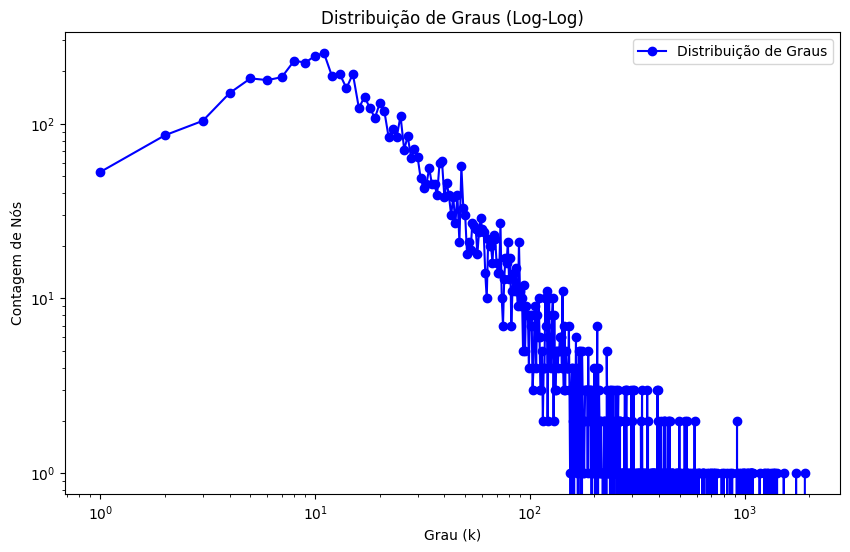

Expoente da lei de potência (γ): -0.98

Erdős-Rényi - Clustering: 0.0080, Caminho médio: 2.64


In [30]:
# Análise da distribuição de graus
degree_counts = nx.degree_histogram(G_undirected)
degrees = range(len(degree_counts))
plt.figure(figsize=(10, 6))
plt.loglog(degrees[1:], degree_counts[1:], 'bo-', label='Distribuição de Graus')
plt.title('Distribuição de Graus (Log-Log)')
plt.xlabel('Grau (k)')
plt.ylabel('Contagem de Nós')
plt.legend()
plt.show()

# Ajuste de lei de potência
fit = stats.powerlaw.fit(degrees[1:], degree_counts[1:])
gamma = -fit[0]  # Expoente da lei de potência
print(f"Expoente da lei de potência (γ): {gamma:.2f}")

# Comparação com modelo aleatório (Erdős-Rényi)
p_er = n_edges / (n_nodes * (n_nodes - 1) / 2)
G_er = nx.erdos_renyi_graph(n_nodes, p_er)
clustering_er = nx.average_clustering(G_er)
avg_path_er = nx.average_shortest_path_length(G_er)
print(f"\nErdős-Rényi - Clustering: {clustering_er:.4f}, Caminho médio: {avg_path_er:.2f}")

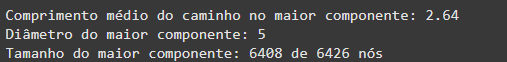

- A distribuição de graus não mostra uma distribuição semelhante a Poisson, mostrando que provavelmente não se assemelha um grafo totalmente aleatório, o que faz sentido levando em consideração o funcionamento do universo Marvel.
- O Cluestering alto comprova isso mais ainda, tirando a possibilidade de ser aleatório.
- A distribuição de Graus tem cauda longa, mostrando que tem poucos hubs, característica de um Scale Free, porém a média de graus e o expoente da lei de potência não se assemelham ao esperado com para um grafo desse tipo.
- Já para redes Small World, com o caminho médio de 2.6 e devido a um grau médio de 52 e um clustering considerável, podemos tender a acreditar que seja uma Small World.
- Podemos concluir que existem aspectos que pendem para Scale Free porém mais Small World, e temos certeza de que não é aleatória.

###2.9. Questões:

####2.9.1. Quais os 3 vértices mais importantes desse grafo e o porquê?

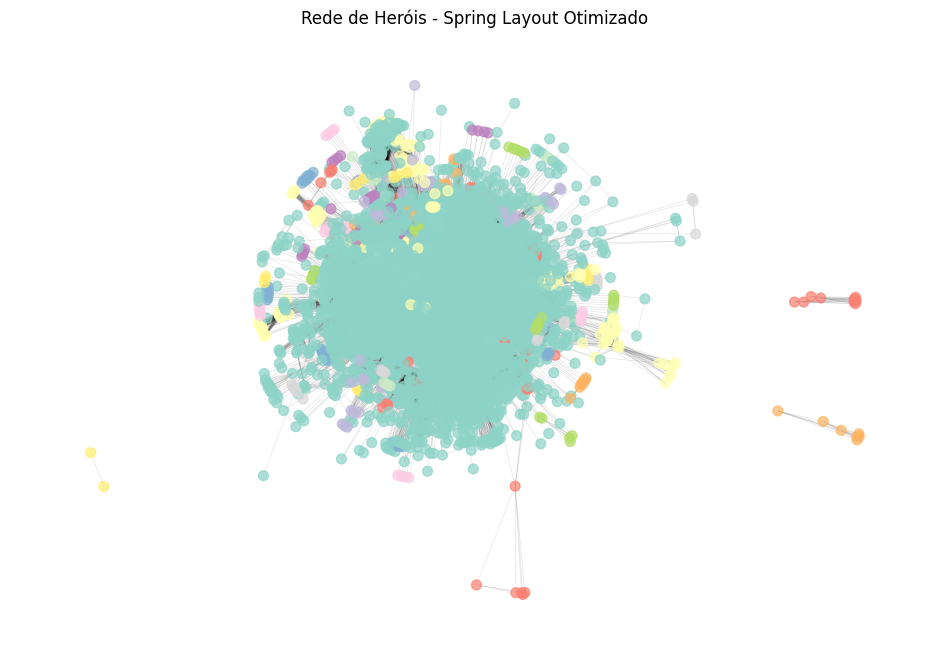

Mesmo o grafo não sendo conexo, podemos concluir que os grupos desconexos podem ser de spin-offs ou histórias totalmente diferentes, mas a grande maioria se encontra num grupo apenas. Com o cálculo das métricas, podemos ver que existem nós que ao mesmo tempo tem influência, são conectados com nós influentes e também fazem parte dos caminhos de outros nós, esses podem ser os vértices mais importantes. Dentre eles podemos citar:
- Capitão América (Grande Influência e valor alto em todas as métricas)
- Homem Aranha (Top 1 em betweeness, sendo parte de grande parte dos caminhos, o cara que conhece o cara)
- Tony Stark/Homem de Ferro (Top 3 em todas as métricas, tendo constância)
<p>Empiricamente a importância faz sentido, levando em consideração que estes personagens são altamente conhecidos pelo público.

####2.9.2. Essa rede tende a ser robusta à falhas?

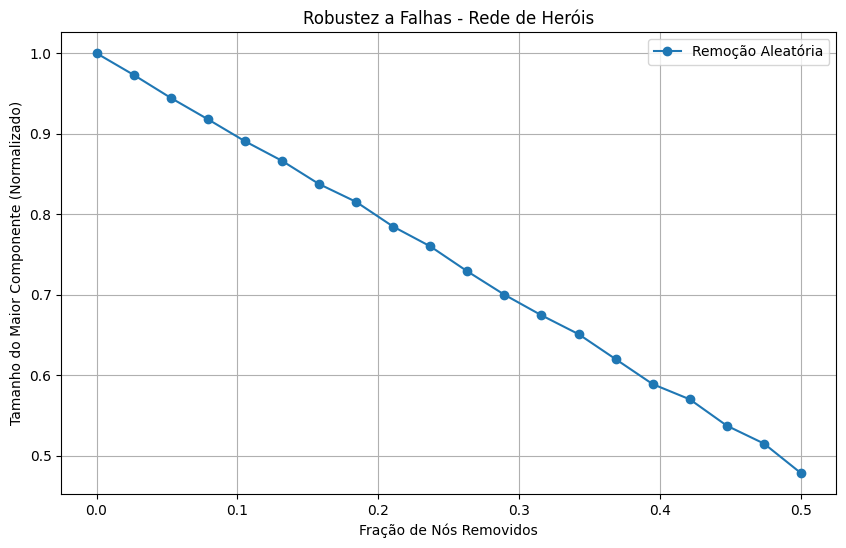

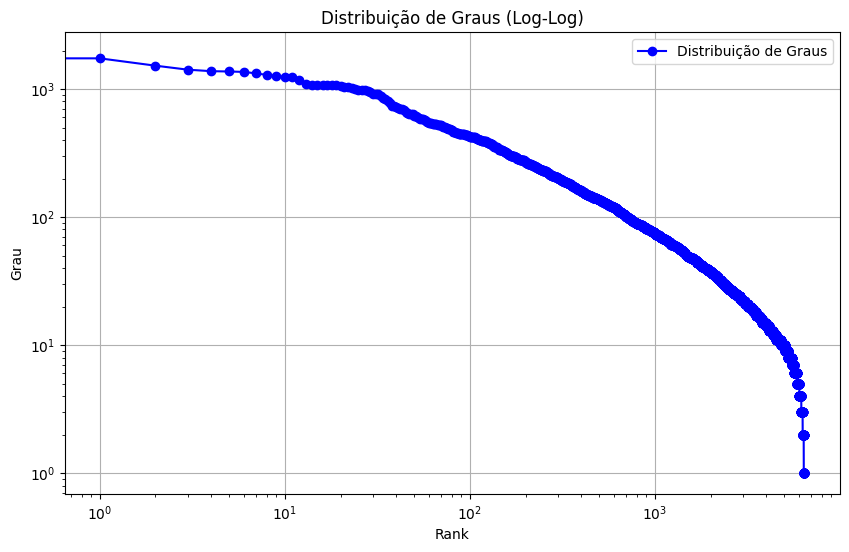

In [32]:
import random

# Função para calcular o tamanho do maior componente conectado
def largest_component_size(G):
    if len(G) == 0:
        return 0
    return len(max(nx.connected_components(G), key=len))

# Simulação de falhas (remoção aleatória de nós)
n_nodes = G_undirected.number_of_nodes()
fractions = np.linspace(0, 0.5, 20)  # Frações de nós a remover (0% a 50%)
results_random = []

G_copy = G_undirected.copy()
initial_size = largest_component_size(G_copy)

for frac in fractions:
    num_remove = int(frac * n_nodes)
    nodes_to_remove = random.sample(list(G_copy.nodes()), num_remove)
    G_temp = G_copy.copy()
    G_temp.remove_nodes_from(nodes_to_remove)
    size = largest_component_size(G_temp)
    results_random.append(size / initial_size)  # Normalizado pelo tamanho inicial

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(fractions, results_random, label='Remoção Aleatória', marker='o')
plt.xlabel('Fração de Nós Removidos')
plt.ylabel('Tamanho do Maior Componente (Normalizado)')
plt.title('Robustez a Falhas - Rede de Heróis')
plt.legend()
plt.grid(True)
plt.show()

# Análise adicional: Distribuição de graus
degrees = [d for n, d in G_undirected.degree()]
plt.figure(figsize=(10, 6))
plt.loglog(sorted(degrees, reverse=True), 'bo-', label='Distribuição de Graus')
plt.xlabel('Rank')
plt.ylabel('Grau')
plt.title('Distribuição de Graus (Log-Log)')
plt.legend()
plt.grid(True)
plt.show()

A queda gradual do tamanho do maior componente indica que a rede é relativamente robusta a falhas aleatórias. Em redes scale-free, como a de heróis (sugerida pelo segundo gráfico), a remoção aleatória de nós geralmente não afeta muito a conectividade, pois a maioria dos nós tem baixo grau, e os hubs (nós de alto grau) permanecem intactos por mais tempo. O fato de o maior componente ainda representar cerca de 50% da rede após remover 50% dos nós é um sinal positivo de robustez.

####2.9.3. A difusão de Informação é fácil nessa rede?

Top 5 hubs por grau: [('CAPTAIN AMERICA', 1908), ('SPIDER-MAN/PETER PAR', 1737), ('IRON MAN/TONY STARK ', 1522), ('THING/BENJAMIN J. GR', 1416), ('MR. FANTASTIC/REED R', 1379)]


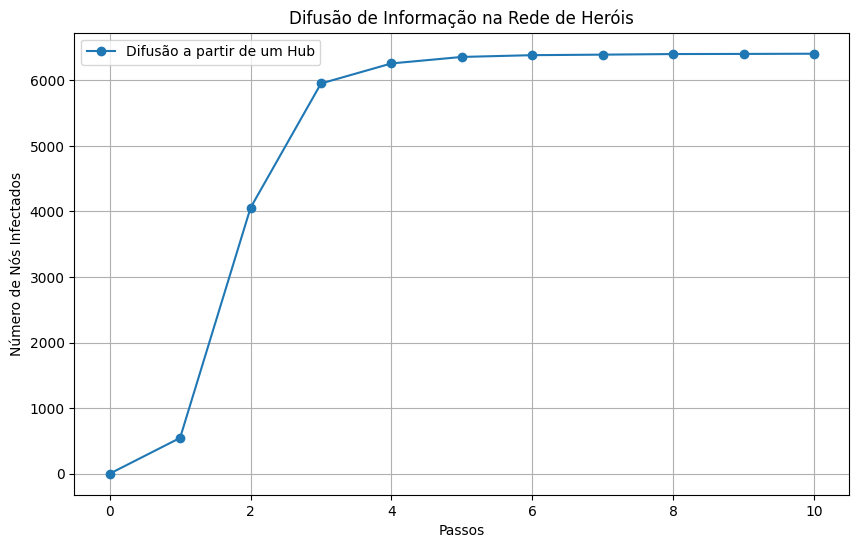

In [39]:
# Identificar hubs (nós com maior grau)
degree = dict(G_undirected.degree())
hubs = sorted(degree.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 hubs por grau:", hubs)

# Simulação de difusão (modelo SI simples)
def simulate_diffusion(G, initial_infected, p_infect=0.3, max_steps=10):
    infected = set(initial_infected)
    history = [len(infected)]

    for _ in range(max_steps):
        new_infected = set()
        for node in infected:
            neighbors = set(G.neighbors(node))
            for neighbor in neighbors - infected:
                if random.random() < p_infect:  # Probabilidade de infecção
                    new_infected.add(neighbor)
        infected.update(new_infected)
        history.append(len(infected))
        if len(infected) >= n_nodes or len(new_infected) == 0:
            break
    return history

# Executar simulação a partir de um hub
initial_node = hubs[0][0]  # Começar com o maior hub
diffusion_history = simulate_diffusion(G_undirected, {initial_node})

# Plotar a difusão
plt.figure(figsize=(10, 6))
plt.plot(diffusion_history, marker='o', label='Difusão a partir de um Hub')
plt.xlabel('Passos')
plt.ylabel('Número de Nós Infectados')
plt.title('Difusão de Informação na Rede de Heróis')
plt.legend()
plt.grid(True)
plt.show()

- A difusão é muito fácil e eficiente quando começa a partir de um hub. O crescimento rápido em poucos passos (de 0 para 5000 nós em 5 passos) mostra que a informação se propaga rapidamente, provavelmente devido à alta conectividade do hub (média de graus de 52) e à estrutura densa da rede (clustering de 0.64).
- Isso é consistente com uma rede small-world, onde hubs agem como pontos de disseminação eficientes.

####2.9.4. A preservação de Informação é fácil nessa rede?

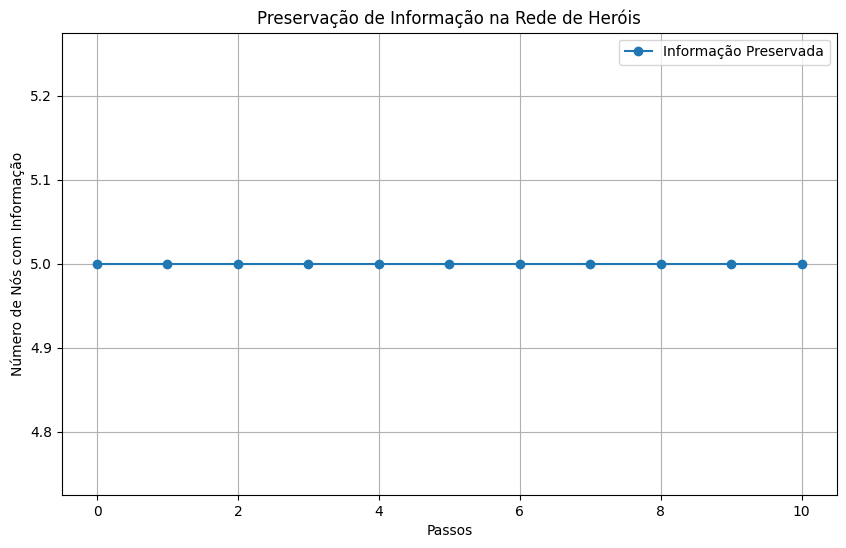

In [40]:
# Simulação de preservação de informação
def simulate_information_preservation(G, initial_nodes, p_loss=0.1, max_steps=10):
    preserved = set(initial_nodes)  # Nós que inicialmente possuem a informação
    history = [len(preserved)]

    for _ in range(max_steps):
        nodes_to_check = list(preserved)
        new_preserved = set()
        for node in nodes_to_check:
            # Simula perda de informação com probabilidade p_loss
            if random.random() >= p_loss:
                new_preserved.add(node)
            # Propaga para vizinhos se o nó ainda tem a informação
            if node in new_preserved:
                neighbors = set(G.neighbors(node)) & preserved
                new_preserved.update(neighbors)
        preserved = new_preserved
        history.append(len(preserved))
        if len(preserved) == 0 or len(preserved) == len(G):
            break
    return history

# Escolher nós iniciais (ex.: os 5 maiores hubs)
degree = dict(G_largest.degree())
hubs = sorted(degree.items(), key=lambda x: x[1], reverse=True)[:5]
initial_nodes = [hub[0] for hub in hubs]

# Executar simulação
preservation_history = simulate_information_preservation(G_largest, initial_nodes, p_loss=0.1)

# Plotar resultados
plt.figure(figsize=(10, 6))
plt.plot(preservation_history, marker='o', label='Informação Preservada')
plt.xlabel('Passos')
plt.ylabel('Número de Nós com Informação')
plt.title('Preservação de Informação na Rede de Heróis')
plt.legend()
plt.grid(True)
plt.show()

- Facilidade Local: A preservação de informação é fácil nos hubs iniciais, pois a informação foi mantida constante em 5 nós ao longo de 10 passos, mesmo com uma probabilidade de perda de 0.1. Isso reflete a robustez local da rede ao redor dos hubs.
- Dificuldade Global: A preservação é difícil em toda a rede, pois a informação não se propagou para outros nós. Isso sugere que a rede depende fortemente dos hubs para reter informação, e a desconexão ou a falta de propagação limita a redundância global.
- Vulnerabilidade: Se os hubs forem perdidos (ex.: por ataques direcionados), a informação pode se perder completamente, já que não há indícios de disseminação.

####2.9.5. É fácil navegar nessa rede?

- Dentro do Maior Componente: A navegação é fácil devido ao caminho médio ser 2.6, apoiada pela alta densidade (grau médio de 52), clustering elevado (0.64), e a rápida difusão a partir de hubs (~6000 nós em 5 passos). Isso sugere caminhos curtos e redundantes, típicos de uma rede small-world.
- Globalmente: A desconexão limita a navegação a componentes isolados. Se o maior componente tiver ~6000 de um total maior de nós, a navegabilidade global é parcial, mas viável na parte principal.
- Contexto de Heróis: Navegar entre heróis conectados (ex.: membros de uma equipe) é intuitivo, mas heróis em componentes isolados são inacessíveis.

Evidências:

- Comprimento médio do caminho no maior componente: 2.64.
- Densidade (52): Muitas conexões facilitam a navegação local.
- Clustering (0.64): Comunidades densas tornam a navegação interna fácil.
- Difusão Rápida: Confirma caminhos curtos no maior componente.